<a href="https://colab.research.google.com/github/semoo009mr/Brain-Tumor-Detection/blob/master/brain_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed
seed(1337)
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow  
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
tensorflow.random.set_seed(42)
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras import layers, models, Model, optimizers
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

Text(0.5, 1.0, 'Number of training images per category:')

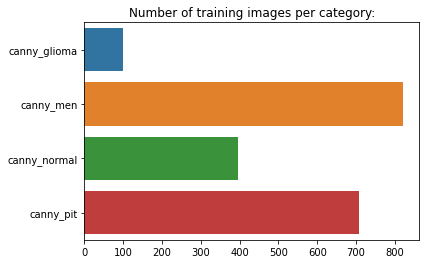

In [38]:
train_data_dir = "/content/drive/MyDrive/dt/training"
val_data_dir = "/content/drive/MyDrive/dt/testing"
test_data_dir = "/content/drive/MyDrive/dt/testing"
 
category_names = sorted(os.listdir('/content/drive/MyDrive/dt/training/'))
nb_categories = len(category_names)
img_pr_cat = []
 
for category in category_names:
    folder = '/content/drive/MyDrive/dt/training' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
 
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

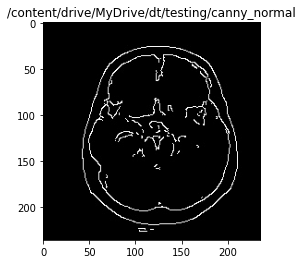

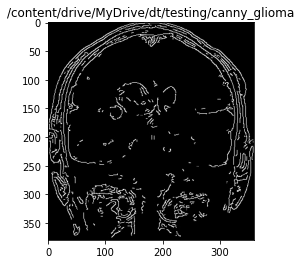

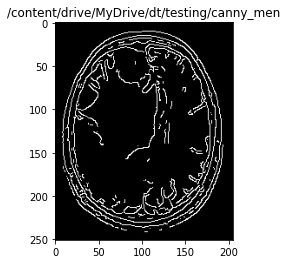

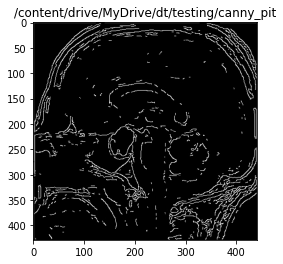

In [39]:
for subdir, dirs, files in os.walk('/content/drive/MyDrive/dt/testing'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file)
        plt.figure()
        plt.title(subdir)
        plt.imshow(image)
        break

In [40]:
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', include_top=False,
pooling='max', input_shape = (img_width, img_height, 3))

In [41]:
for layer in conv_base.layers[:-5]:
    layer.trainable = False

for layer in conv_base.layers:
    print(layer, layer.trainable)


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f65917819d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f659175eb90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6591980c50> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f659175e750> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f639f073910> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f639f0e4410> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f65919ffc90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f639f02c350> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f6591a337d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f659169fa90> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f639f151a90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [42]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 14,716,740
Trainable params: 7,081,476
Non-trainable params: 7,635,264
_________________________________________________________________


In [43]:
#Number of images to load at each iteration
batch_size = 32
 
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
 
# these are generators for train/test data that will read pictures
#found in the defined subfolders of 'data/'
 
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")
 
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
 
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 2026 images belonging to 4 classes.
Total number of images for "validation":
Found 394 images belonging to 4 classes.
Total number of images for "testing":
Found 394 images belonging to 4 classes.


In [44]:
learning_rate = 5e-5
epochs = 10
 
checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate, clipnorm = 1.), metrics = ['acc'])

In [45]:
history = model.fit_generator(train_generator,
                              epochs=epochs,
                              shuffle=True,
                              validation_data=val_generator,
                              callbacks=[checkpoint]
                              )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


64/64 [==============================] - 11s 165ms/step - loss: 0.9188 - acc: 0.6528 - val_loss: 0.9032 - val_acc: 0.6041

Epoch 00001: val_acc improved from -inf to 0.60406, saving model to sign_classifier.h5
Epoch 2/10
64/64 [==============================] - 10s 161ms/step - loss: 0.3583 - acc: 0.8788 - val_loss: 0.6037 - val_acc: 0.7665

Epoch 00002: val_acc improved from 0.60406 to 0.76650, saving model to sign_classifier.h5
Epoch 3/10
64/64 [==============================] - 10s 162ms/step - loss: 0.1888 - acc: 0.9367 - val_loss: 0.6018 - val_acc: 0.7792

Epoch 00003: val_acc improved from 0.76650 to 0.77919, saving model to sign_classifier.h5
Epoch 4/10
64/64 [==============================] - 10s 162ms/step - loss: 0.1197 - acc: 0.9650 - val_loss: 0.2663 - val_acc: 0.9086

Epoch 00004: val_acc improved from 0.77919 to 0.90863, saving model to sign_classifier.h5
Epoch 5/10
64/64 [==============================] - 11s 164ms/step - loss: 0.0674 - acc: 0.9806 - val_loss: 0.1460 - v

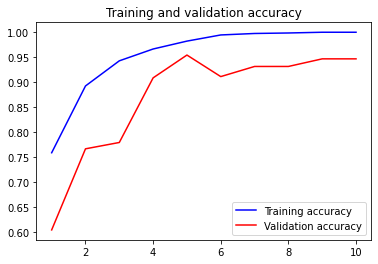

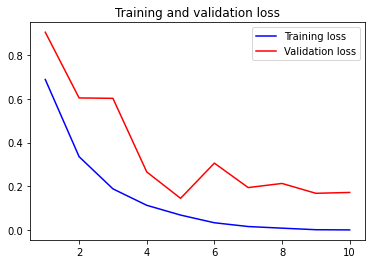

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc)+1)
 
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Accuracy.jpg')
 
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss.jpg')

In [47]:
import numpy as np
import matplotlib.pyplot as plt
 
def plot_confusion_matrix(cm, classes, figname,
 normalize=True,
 title='Confusion matrix',
 cmap=plt.cm.Blues):

 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
 if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
 else:
    print('Confusion matrix, without normalization')
 
 plt.figure(figsize=(8,8))
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 #plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=90)
 plt.yticks(tick_marks, classes)
 
 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="black"  )
 
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
 plt.tight_layout()
 plt.savefig(figname)

In [48]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
 import numpy as np
 import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Normalized confusion matrix


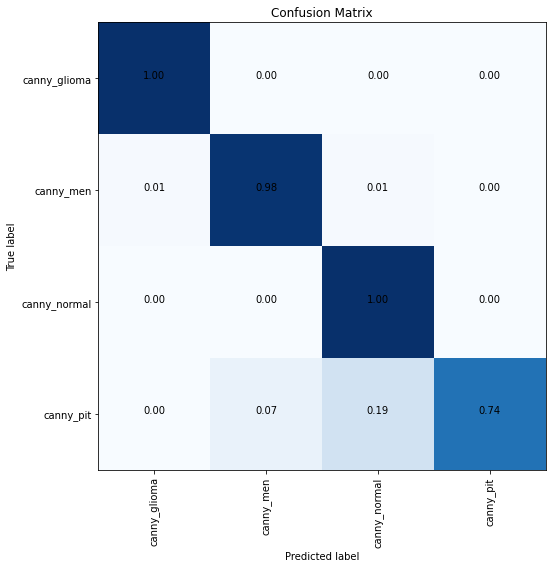

In [49]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix( cm, classes = category_names, title='Confusion Matrix', normalize=True, figname = 'Confusion_matrix_concrete.jpg')


In [60]:
from sklearn import metrics


In [63]:
brain=['canny_glioma','canny_men','canny_normal','canny_pit']
classification_metrics=metrics.classification_report(test_generator.classes,y_pred,target_names=brain)
print(classification_metrics)

              precision    recall  f1-score   support

canny_glioma       0.97      1.00      0.99       100
   canny_men       0.92      0.99      0.95       115
canny_normal       0.97      0.99      0.98       105
   canny_pit       1.00      0.81      0.90        74

    accuracy                           0.96       394
   macro avg       0.97      0.95      0.95       394
weighted avg       0.96      0.96      0.96       394



In [50]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 94.7% 


In [51]:
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))
 
#for layer in conv_base.layers[:-13]:
#    layer.trainable = False
 
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 2052      
Total params: 14,716,740
Trainable params: 14,716,740
Non-trainable params: 0
_________________________________________________________________


In [52]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        brightness_range = (0.9,1.1),
        fill_mode='nearest'
        )
 
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
 
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
#save_to_dir='augm_images',
save_prefix='aug',
save_format='jpg',
class_mode = "categorical")

Found 2026 images belonging to 4 classes.


In [53]:
learning_rate = 5e-5
epochs = 20
checkpoint = ModelCheckpoint("sign_classifier_augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate, clipnorm=1.), metrics = ['acc'])
 
history = model.fit_generator(train_generator,
                              epochs=epochs,
                              shuffle=True,
                              validation_data=test_generator,
                              callbacks=[checkpoint]
                              )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
64/64 [==============================] - 40s 597ms/step - loss: 1.0329 - acc: 0.5782 - val_loss: 1.0978 - val_acc: 0.5685

Epoch 00001: val_acc improved from -inf to 0.56853, saving model to sign_classifier_augm.h5
Epoch 2/20
64/64 [==============================] - 38s 591ms/step - loss: 0.5942 - acc: 0.7916 - val_loss: 0.9332 - val_acc: 0.6345

Epoch 00002: val_acc improved from 0.56853 to 0.63452, saving model to sign_classifier_augm.h5
Epoch 3/20
64/64 [==============================] - 38s 592ms/step - loss: 0.4205 - acc: 0.8621 - val_loss: 0.7588 - val_acc: 0.6675

Epoch 00003: val_acc improved from 0.63452 to 0.66751, saving model to sign_classifier_augm.h5
Epoch 4/20
64/64 [==============================] - 38s 594ms/step - loss: 0.3657 - acc: 0.8575 - val_loss: 0.5722 - val_acc: 0.8249

Epoch 00004: val_acc improved from 0.66751 to 0.82487, saving model to sign_classifier_augm.h5
Epoch 5/20
64/64 [==============================] - 38s 597ms/step - loss: 0.2442 - acc

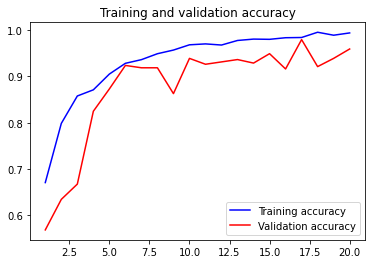

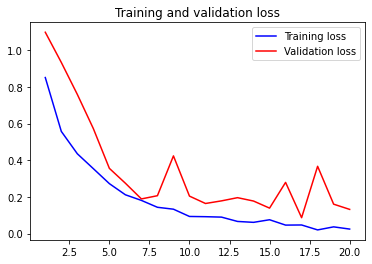

In [54]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc)+1)
 
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
#plt.savefig('Accuracy_Augmented.jpg')
 
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#plt.savefig('Loss_Augmented.jpg')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Normalized confusion matrix


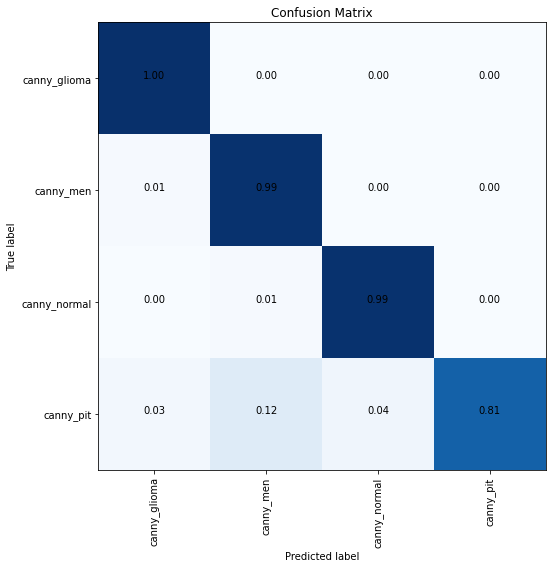

In [55]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
 
cm_aug = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm_aug, classes = category_names,
title='Confusion Matrix', normalize=True, figname = 'Confusion_matrix_Augm.jpg')

In [64]:
brain=['canny_glioma','canny_men','canny_normal','canny_pit']
classification_metrics=metrics.classification_report(test_generator.classes,y_pred,target_names=brain)
print(classification_metrics)

              precision    recall  f1-score   support

canny_glioma       0.97      1.00      0.99       100
   canny_men       0.92      0.99      0.95       115
canny_normal       0.97      0.99      0.98       105
   canny_pit       1.00      0.81      0.90        74

    accuracy                           0.96       394
   macro avg       0.97      0.95      0.95       394
weighted avg       0.96      0.96      0.96       394



In [56]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 95.9% 


In [57]:
test_subset_data_dir = "/content/drive/MyDrive/dt/testing"
 
test_subset_generator = test_datagen.flow_from_directory(
test_subset_data_dir,
batch_size = batch_size,
target_size = (img_height, img_width),
class_mode = "categorical",
shuffle=False)

Found 394 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


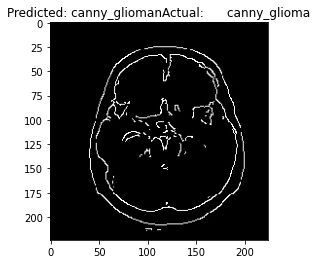

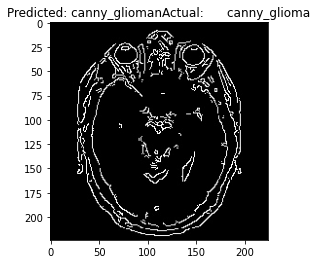

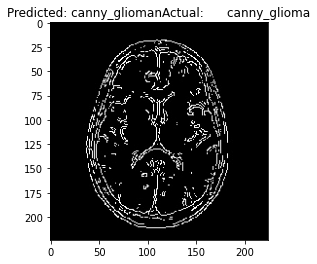

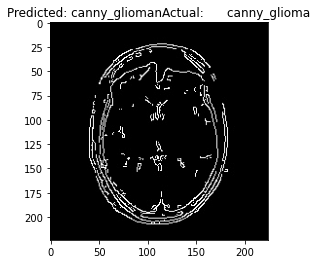

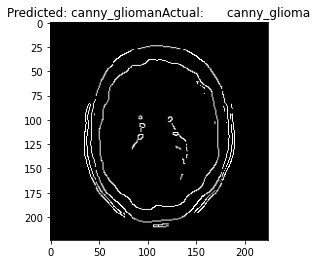

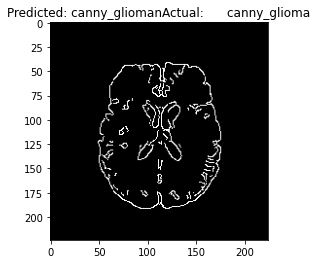

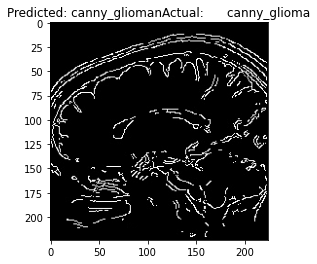

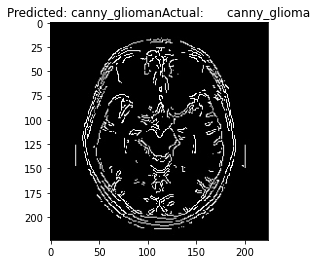

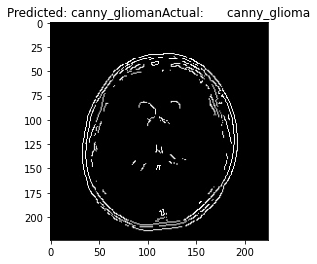

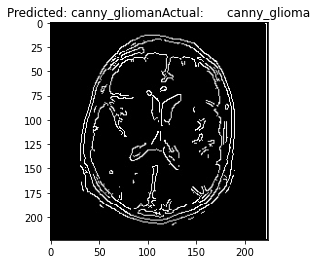

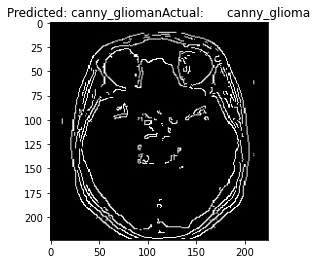

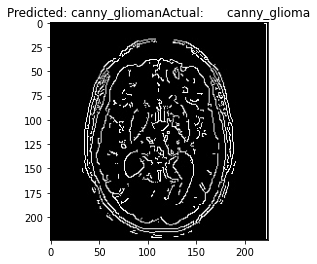

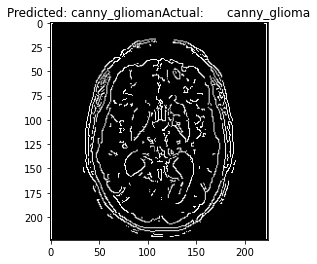

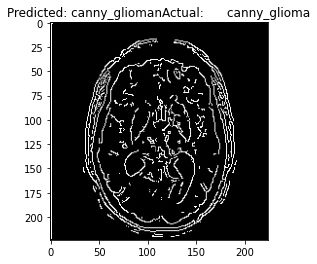

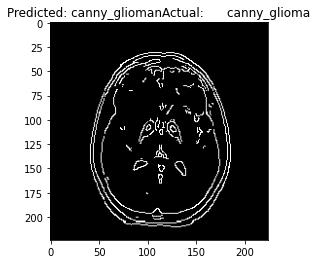

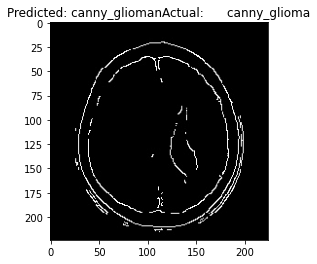

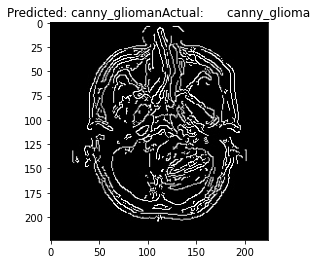

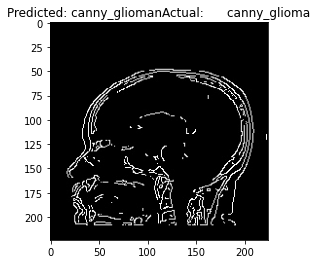

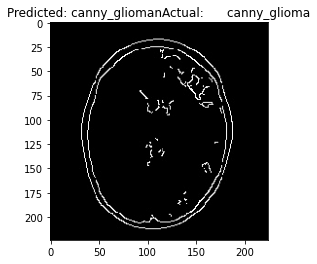

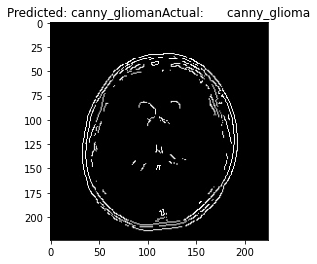

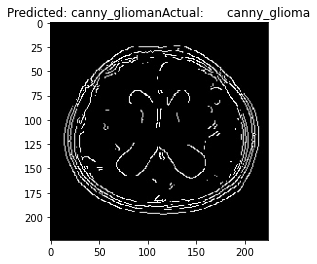

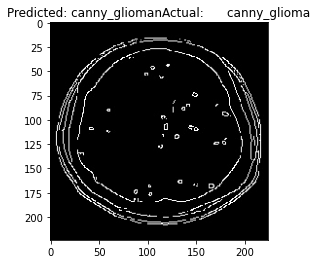

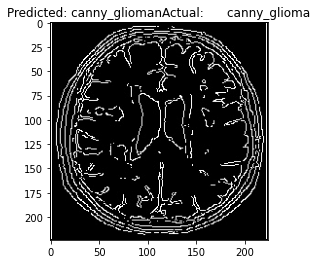

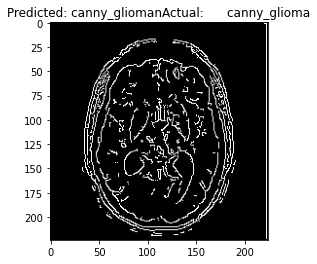

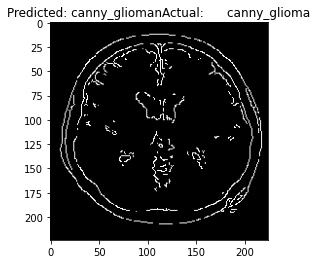

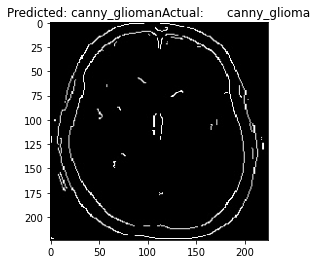

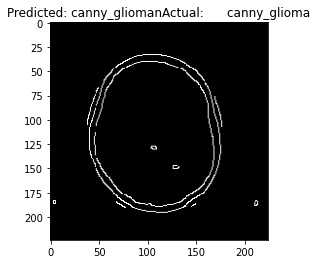

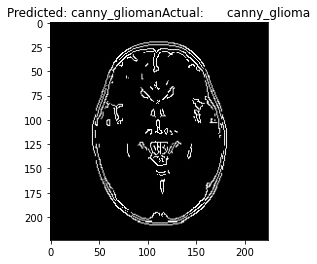

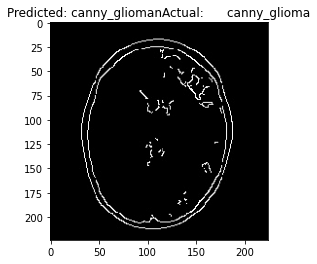

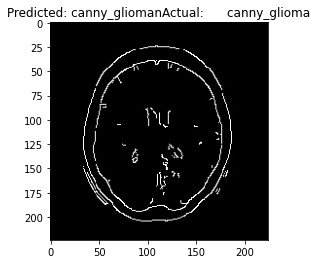

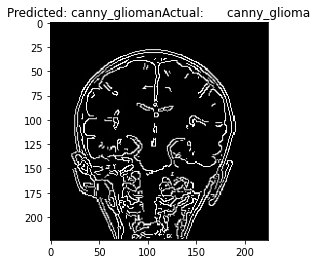

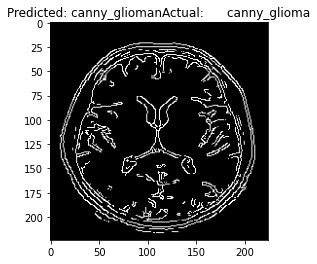

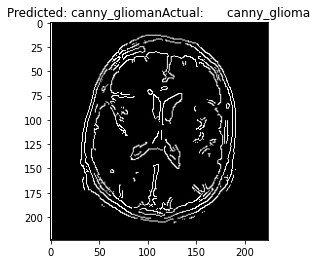

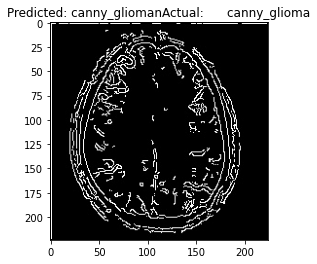

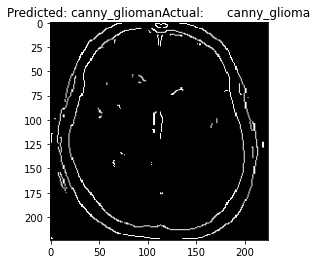

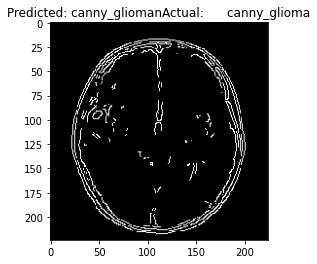

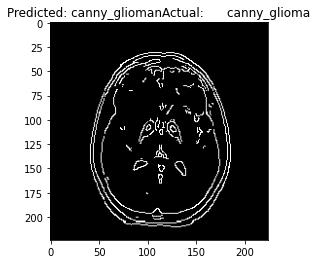

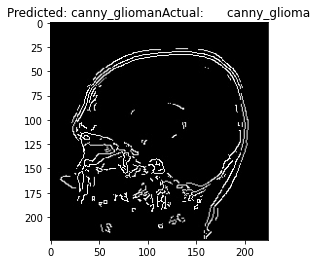

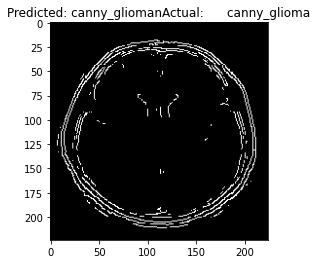

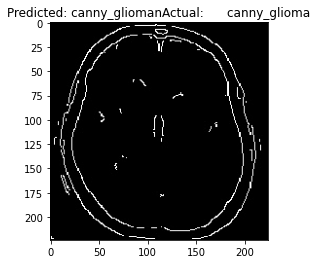

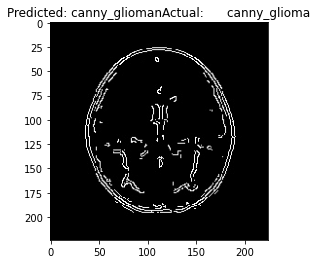

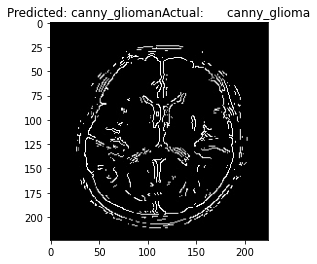

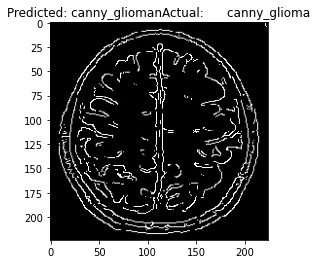

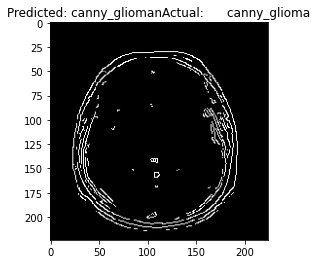

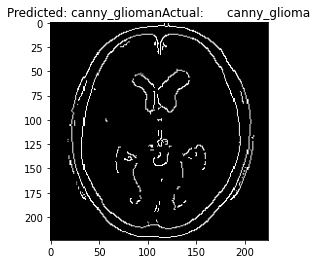

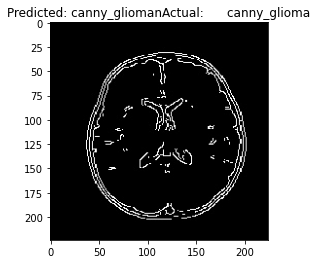

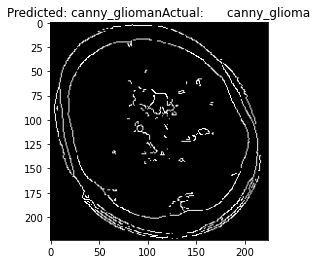

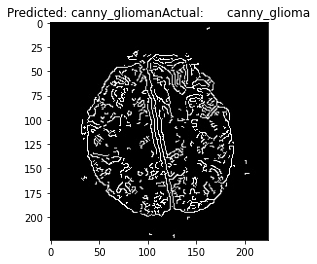

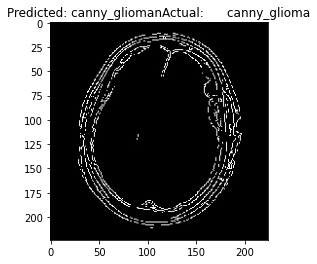

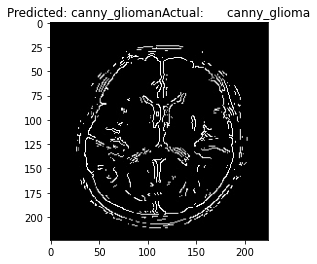

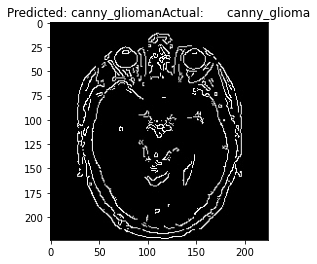

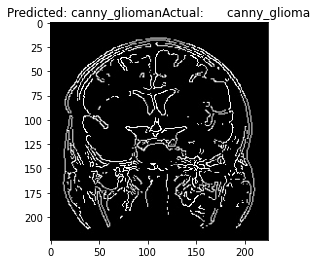

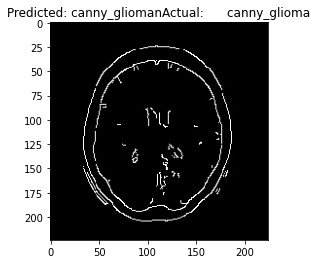

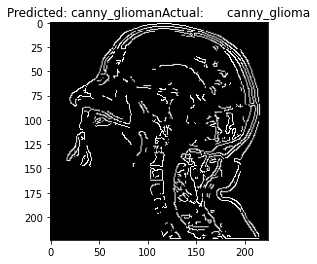

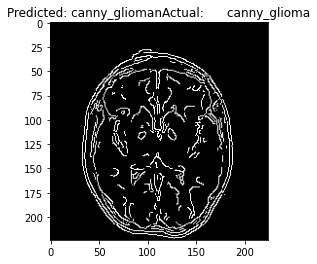

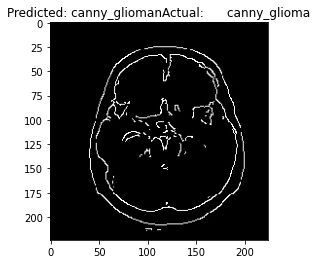

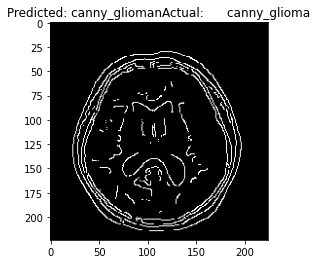

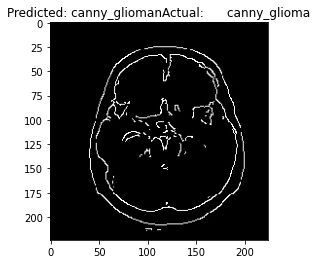

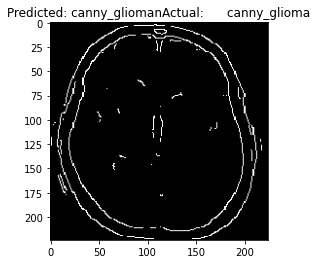

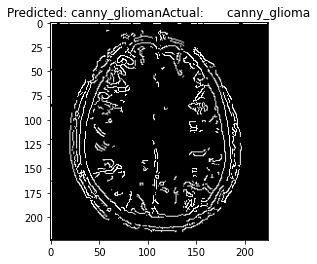

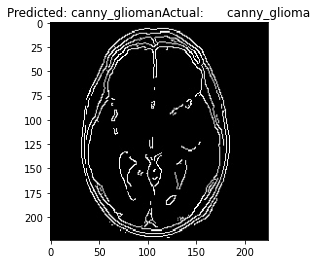

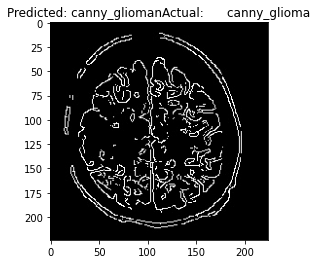

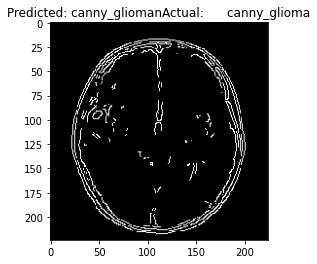

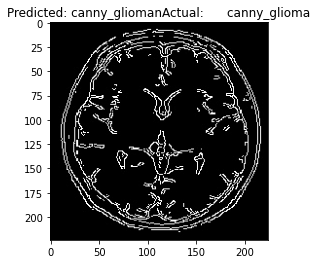

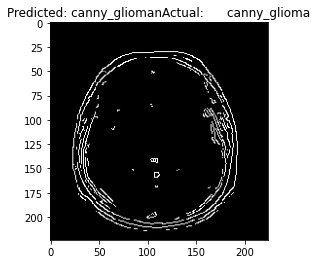

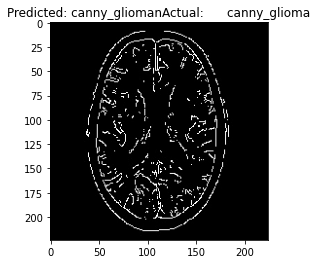

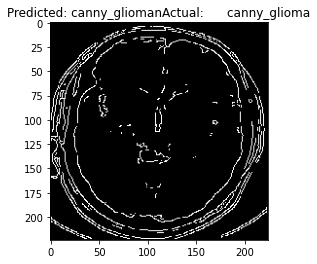

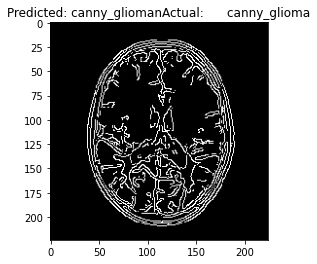

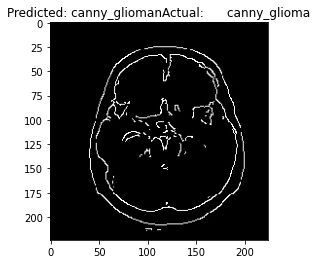

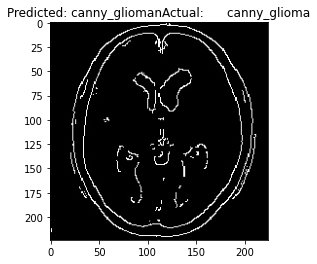

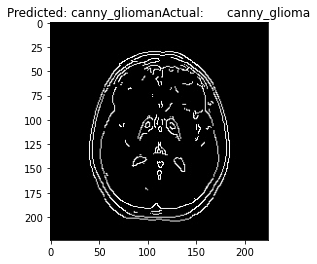

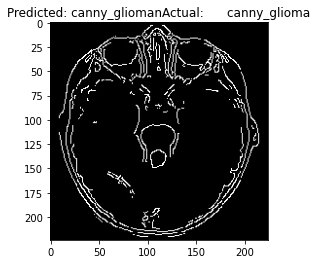

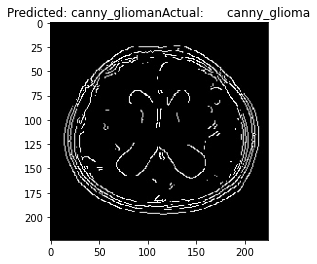

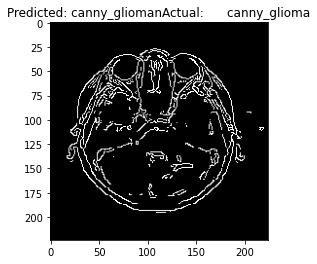

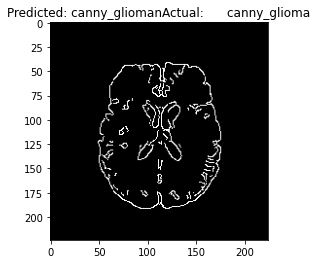

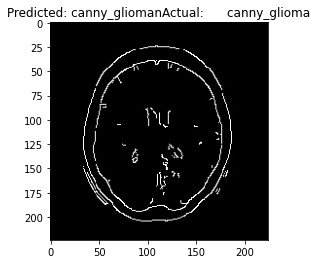

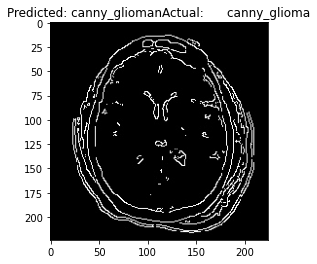

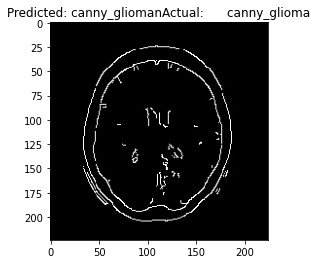

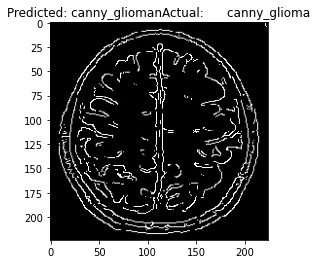

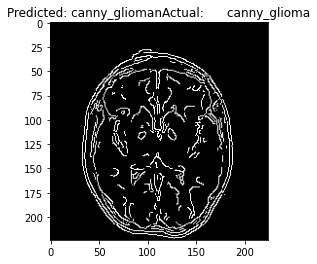

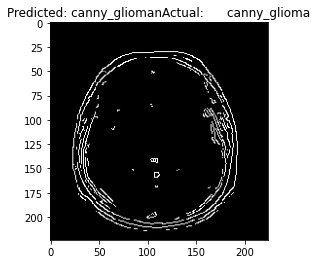

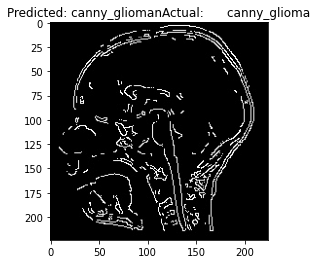

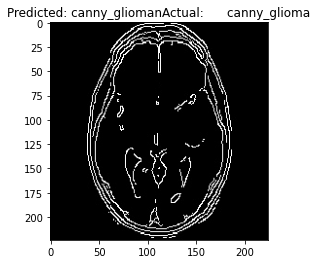

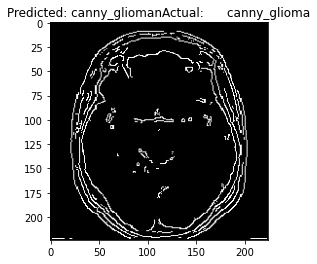

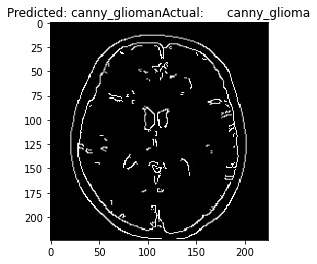

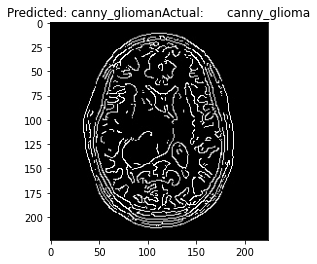

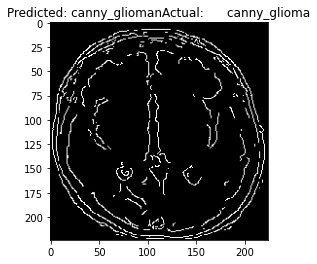

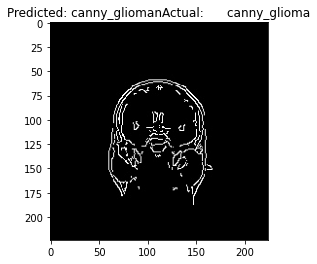

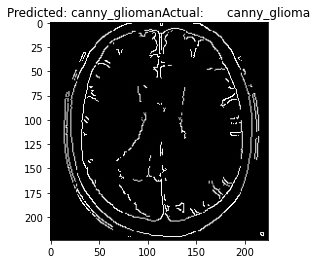

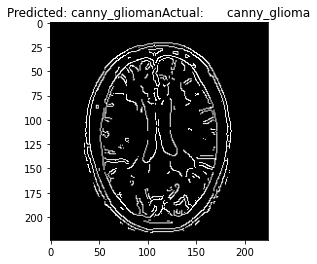

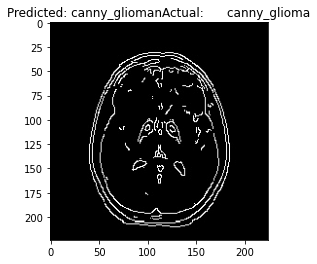

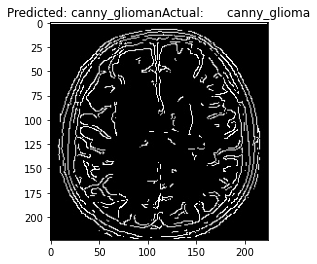

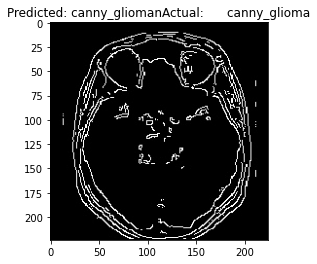

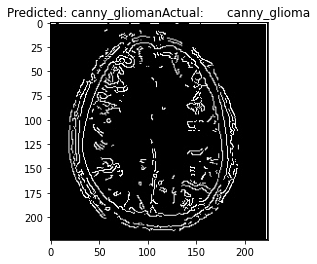

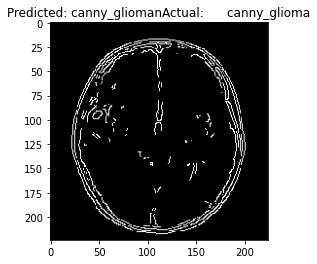

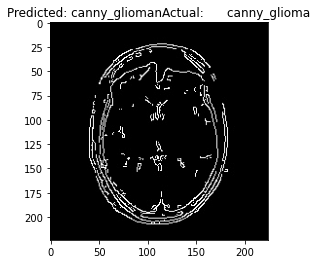

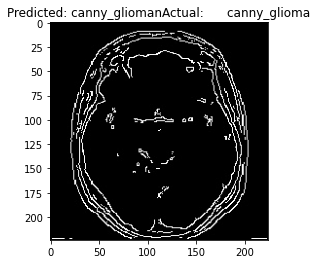

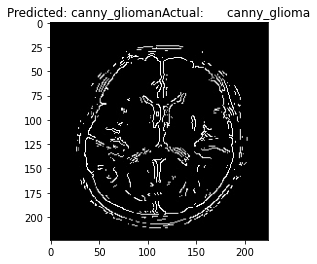

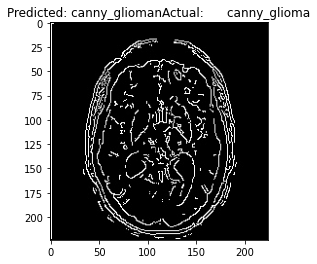

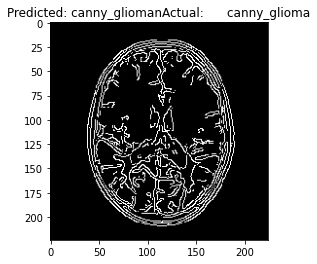

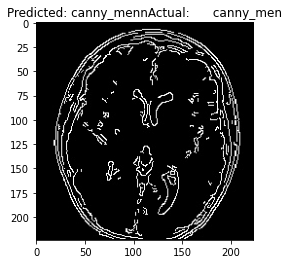

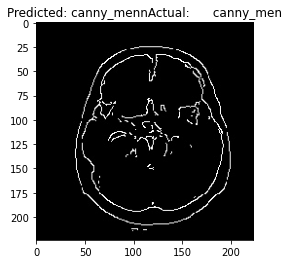

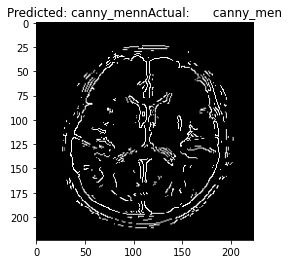

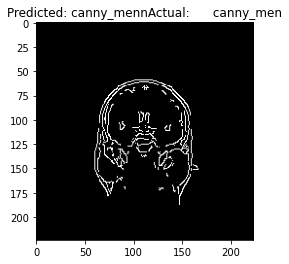

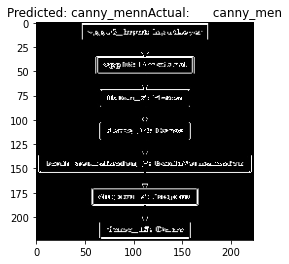

In [58]:
Y_pred = model.predict_generator(test_subset_generator)
y_pred = np.argmax(Y_pred, axis=1)
 
img_nr = 0
for subdir, dirs, files in os.walk('/content/drive/MyDrive/dt/testing/canny_normal'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file,target_size=(img_height,img_width))
        pred_emotion = category_names[y_pred[img_nr]]
        real_emotion = category_names[test_subset_generator.classes[img_nr]]
        plt.figure()
        plt.title('Predicted: ' + pred_emotion + 'n' +      'Actual:      ' + real_emotion)
        plt.imshow(image)
        img_nr = img_nr +1